<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Train-Test-set-split" data-toc-modified-id="Train-Test-set-split-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Train Test set split</a></span></li><li><span><a href="#평가" data-toc-modified-id="평가-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>평가</a></span></li><li><span><a href="#functions" data-toc-modified-id="functions-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>functions</a></span></li></ul></div>

In [2]:
# 전처리, 차원축소, 평가 모듈
import module.muresa as muresa

# 데이터 입출력
import numpy as np
import pandas as pd

# 검정 
import scipy.stats as st

# 전처리
from sklearn.preprocessing import MinMaxScaler,RobustScaler,Normalizer
from sklearn.decomposition import PCA,TruncatedSVD # 차원축소

# Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# 시각화
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sb


In [6]:
df=pd.read_csv(r'data/df_3.csv')
df2=pd.read_csv(r'data/df_2.csv')

In [7]:
df.drop(columns='Unnamed: 0',inplace = True)

# Train Test set split

In [18]:
x,y = df.drop(columns = 'Class'),df.Class
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.4,random_state = 123)
# smapling with Trainset
x_train_sm,x_test_sm, y_train_sm, y_test_sm = muresa.SMOTESampling(x_train,y_train, over = 0.4, ratio = 0.3,random_state=123)

In [3]:
train_1 = pd.read_csv(r'data/fraud_train_01.csv')
train_2 = pd.read_csv(r'data/fraud_train_02.csv')
train_3 = pd.read_csv(r'data/fraud_train_03.csv')

test_1 = pd.read_csv(r'data/fraud_test_01.csv')
test_2 = pd.read_csv(r'data/fraud_test_02.csv')
test_3 = pd.read_csv(r'data/fraud_test_03.csv')

In [4]:
x_train_1, y_train_1 = train_1.drop(['Class','Time'],axis = 1), train_1.Class
x_train_2, y_train_2 = train_2.drop(['Class','Time'],axis = 1), train_2.Class
x_train_3, y_train_3 = train_3.drop(['Class','Time'],axis = 1), train_3.Class

x_test_1, y_test_1 = test_1.drop(['Class','Time'],axis = 1), test_1.Class
x_test_2, y_test_2 = test_2.drop(['Class','Time'],axis = 1), test_2.Class
x_test_3, y_test_3 = test_3.drop(['Class','Time'],axis = 1), test_3.Class

In [15]:
test_1.shape

(28944, 31)

In [16]:
train_1.shape

(255863, 31)

In [7]:
glm1 = LogisticRegression().fit(x_train_1,y_train_1)
glm2 = LogisticRegression().fit(x_train_2,y_train_2)
glm3 = LogisticRegression().fit(x_train_3,y_train_3)

d:\pl\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
d:\pl\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
d:\pl\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


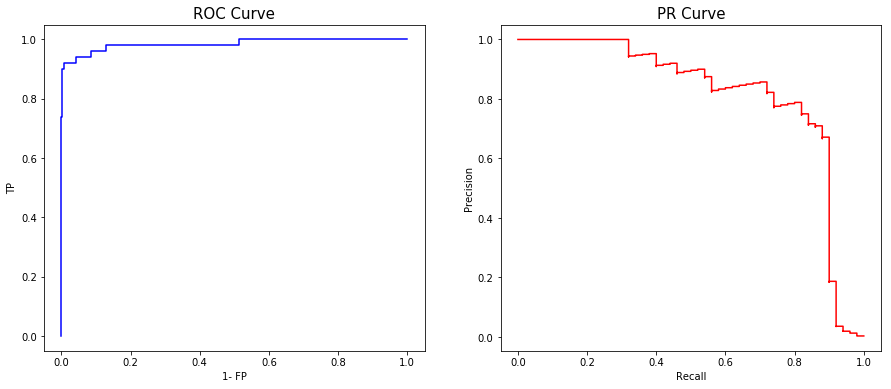

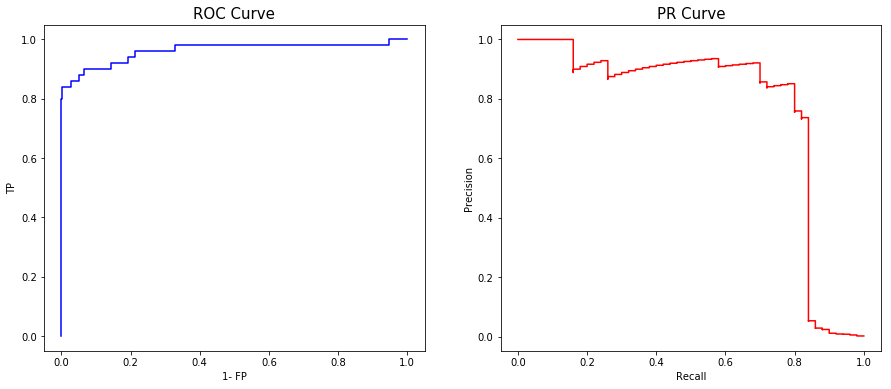

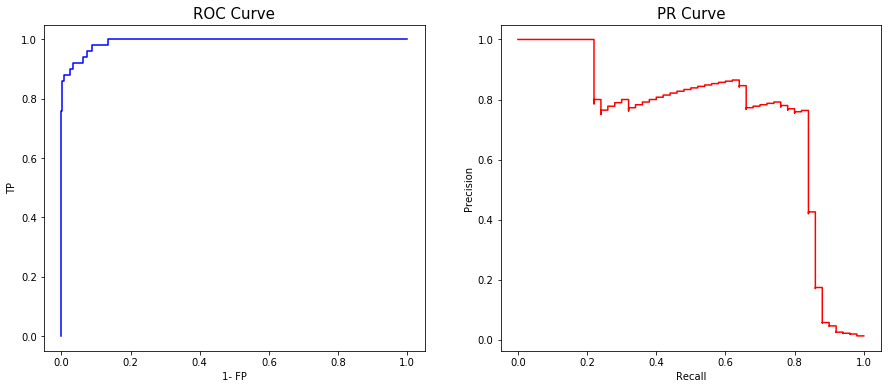

In [12]:
res1= evaluation_class(y_test_1,glm1.predict_proba(x_test_1))
res2= evaluation_class(y_test_2,glm2.predict_proba(x_test_2))
res3= evaluation_class(y_test_3,glm3.predict_proba(x_test_3))

In [13]:
print(f'{res1} \n {res2} \n {res3}')

{'confusion matrix': array([[28888,     6],
       [   14,    36]], dtype=int64), 'acc': 0.9993090105030403, 'recall': 0.72, 'precision': 0.8571428571428571, 'f1 score': 0.782608695652174, 'average precision': 0.816059900240613} 
 {'confusion matrix': array([[28891,     3],
       [   20,    30]], dtype=int64), 'acc': 0.9992053620784964, 'recall': 0.6, 'precision': 0.9090909090909091, 'f1 score': 0.7228915662650602, 'average precision': 0.7705554751924028} 
 {'confusion matrix': array([[28889,     5],
       [   21,    29]], dtype=int64), 'acc': 0.9991017136539525, 'recall': 0.58, 'precision': 0.8529411764705882, 'f1 score': 0.6904761904761905, 'average precision': 0.735255918832873}


# 평가

d:\pl\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


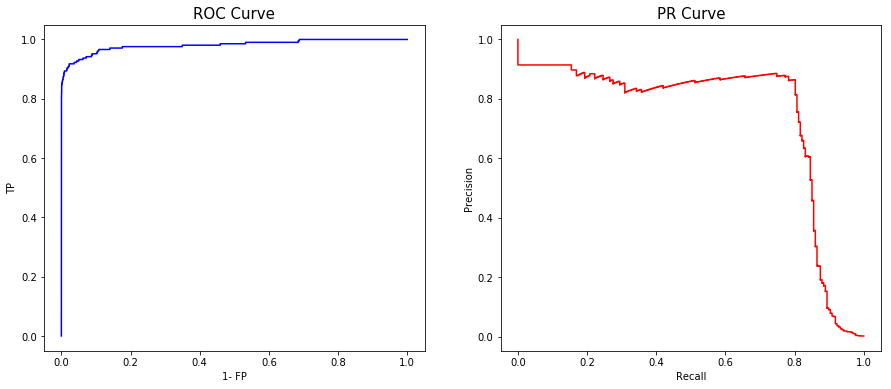

In [31]:
glm = LogisticRegression().fit(x_train_sm,y_train_sm)
y_pred_glm= glm.predict_proba(x_test)
glm_res = evaluation_class(y_test,y_pred_glm)

d:\pl\python\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


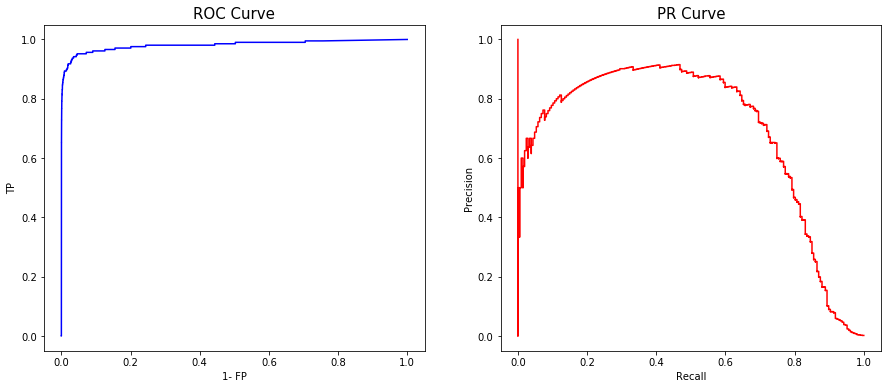

In [34]:
svm = SVC(probability=True).fit(x_train_sm,y_train_sm)
y_pred_svm = svm.predict_proba(x_test)
svm_res = evaluation_class(y_test,y_pred_svm)

In [39]:
svm_res

{'confusion matrix': array([[113511,    205],
        [    39,    168]], dtype=int64),
 'acc': 0.9978582024700895,
 'recall': 0.8115942028985508,
 'precision': 0.450402144772118,
 'f1 score': 0.5793103448275861,
 'average precision': 0.6809323099768543}

# functions

In [9]:
# Evaluation
def evaluation_class(y_true,y_pred,true_idx=1,thresholds = 0.5):
    
    from sklearn import metrics # for result
    import matplotlib.pyplot as plt # for visualization
    
    # tranform y_pred into integer array
    y_pred_val = ([1 if prob>thresholds else 0 for prob in y_pred[:,true_idx]])
    # counfusion matrix
    conf_mat = metrics.confusion_matrix(y_true,y_pred_val)
    
    #acc
    acc = metrics.accuracy_score(y_true,y_pred_val)   
    #recall
    re = metrics.recall_score(y_true,y_pred_val) 
    #precision
    pre = metrics.precision_score(y_true,y_pred_val)
    #f1
    f1 = metrics.f1_score(y_true,y_pred_val)   
    #average precsion
    avg_pre = metrics.average_precision_score(y_true,y_pred[:,true_idx])  
    
    # visualization
    fig,ax = plt.subplots(1,2,figsize = (15,6))
    # ROC
    fpr,tpr,thresholds = metrics.roc_curve(y_true,y_pred[:,true_idx])
    ax[0].plot(fpr,tpr,color = 'b')
    ax[0].set_title('ROC Curve',fontsize = 15)
    ax[0].set_xlabel('1- FP')
    ax[0].set_ylabel('TP')
    
    # PR
    precision,recall,thresholds = metrics.precision_recall_curve(y_true,y_pred[:,true_idx])
    ax[1].step(recall,precision,color = 'r', where = 'post')
    ax[1].set_title('PR Curve',fontsize = 15)
    ax[1].set_xlabel('Recall')
    ax[1].set_ylabel('Precision')
    
    # 결과 저장
    result_dic = {
        'confusion matrix':conf_mat,
        'acc':acc,
        'recall':re,
        'precision':pre,
        'f1 score':f1,
        'average precision':avg_pre
    }
    return result_dic